In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pytorch-msssim

In [ ]:
import glob
import random
import os
import numpy as np
import argparse
import math
import itertools
import sys

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms

import torchvision.transforms as transforms
from torchvision.utils import save_image, make_grid

from torch.utils.data import DataLoader
from torch.autograd import Variable

from matplotlib import pyplot as plt

from pytorch_msssim import ssim, ms_ssim, SSIM, MS_SSIM

# Normalization parameters for pre-trained PyTorch models
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

In [ ]:
from drive.MyDrive.ImageSuperResolution import final

In [ ]:
class ImageDataset(Dataset):
    def __init__(self, root, shape, transform):
        height, width = shape
        # Transforms for low resolution images and high resolution images
        self.transform = transform

        self.files = sorted(glob.glob(root + "/*.*"))

    def __getitem__(self, index):
        low_path = self.files[index % len(self.files)]
        #high_path = low_path.replace('low','high')
        
        img_low = Image.open(low_path)
        #img_high = Image.open(high_path)
        
        img_low = self.transform(img_low)
        #img_high = self.transform(img_high)
         
        name = low_path[80:]

        return {"low": img_low, "name": name}


    def __len__(self):
        return len(self.files)

In [ ]:
root = '/content/drive/MyDrive/ImageSuperResolution/DatasetBatches/test/SRGAN_generated/'
shape = (400,400)

transform = transforms.Compose(
            [
                #transforms.Resize((shape[0], shape[1]), Image.BICUBIC),
                transforms.ToTensor(),
                #transforms.Normalize(mean, std),
            ]
        )

In [ ]:
data = ImageDataset(root, shape, transform)

In [ ]:
data[0]['low'].shape

torch.Size([3, 400, 400])

In [ ]:
data[0]['name']

'image5000.jpg'

In [ ]:
n = 200
batch_size = 1
channels = 3

CONV_BLOCKS = 5

In [ ]:
final = final.out(channels, CONV_BLOCKS)

In [ ]:
cuda = torch.cuda.is_available()

In [ ]:
if cuda:
    final = final.cuda()

In [ ]:
final.load_state_dict(torch.load("drive/MyDrive/ImageSuperResolution/final/saved_models/out_"+str(n-1)+".pth"))

<All keys matched successfully>

In [ ]:
dataloader = DataLoader(
    data,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0,
)

In [ ]:
Tensor = torch.cuda.FloatTensor if cuda else torch.Tensor

In [ ]:
os.makedirs("drive/MyDrive/ImageSuperResolution/DatasetBatches/test/final_generated", exist_ok=True)

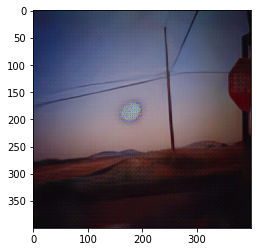

In [ ]:
k = data[0]['low']
plt.imshow(data[0]['low'].permute(1,2,0))

In [ ]:
k = k[np.newaxis, ...]


In [ ]:
Variable(k.type(Tensor)).shape

torch.Size([1, 3, 400, 400])

In [ ]:
final(Variable(k.type(Tensor)))

tensor([[[[0.1482, 0.1687, 0.1656,  ..., 0.0876, 0.0789, 0.1204],
          [0.1628, 0.1592, 0.1693,  ..., 0.0882, 0.0753, 0.0879],
          [0.1654, 0.1652, 0.1701,  ..., 0.0743, 0.0736, 0.0807],
          ...,
          [0.0605, 0.0558, 0.0450,  ..., 0.0574, 0.0598, 0.0710],
          [0.0482, 0.0641, 0.0614,  ..., 0.0789, 0.0818, 0.0774],
          [0.0864, 0.0626, 0.0623,  ..., 0.0744, 0.0797, 0.0798]],

         [[0.1955, 0.2130, 0.2203,  ..., 0.0685, 0.0619, 0.0773],
          [0.2166, 0.2068, 0.2137,  ..., 0.0661, 0.0682, 0.0708],
          [0.2184, 0.2182, 0.2216,  ..., 0.0686, 0.0699, 0.0624],
          ...,
          [0.0562, 0.0430, 0.0482,  ..., 0.0501, 0.0541, 0.0552],
          [0.0542, 0.0447, 0.0566,  ..., 0.0538, 0.0549, 0.0564],
          [0.1104, 0.0712, 0.0655,  ..., 0.0563, 0.0600, 0.0754]],

         [[0.2629, 0.2776, 0.3004,  ..., 0.0736, 0.0715, 0.0850],
          [0.2759, 0.2721, 0.2878,  ..., 0.0735, 0.0778, 0.0687],
          [0.2881, 0.2844, 0.2849,  ..., 0

In [ ]:
image = outputs[i]

In [ ]:
generated_image_root = 'drive/MyDrive/ImageSuperResolution/DatasetBatches/test/final_generated/'
for i, imgs in enumerate(dataloader):
        img_low = Variable(imgs["low"].type(Tensor))
        outputs = final(img_low)
        outputs.detach_
        outputs = outputs.to('cpu')
        for i, img in enumerate(outputs):
            save_image(img, generated_image_root + imgs['name'][i])